In [16]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

df = fdr.DataReader('005930', '2018-05-04', '2020-01-22')
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx
X = dfx.values.tolist()
y = dfy.values.tolist()
window_size = 10
window_size2= 20
data_X = []
data_y = []
for i in range(len(y) - window_size2):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size:i + window_size2]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

[[0.7596741344164575, 0.7499999999970238, 0.7545271629748308, 0.13013527827853805], [0.7596741344164575, 0.7460317460287855, 0.7344064386288354, 0.09194820685695666], [0.7393075356385364, 0.718253968251118, 0.722334004021238, 0.12629238039070007], [0.7026476578382784, 0.7063492063464033, 0.7062374245444417, 0.08866108851619439], [0.7433808553941206, 0.7658730158699767, 0.7505030181056318, 0.13381706813578303], [0.7637474541720417, 0.753968253965262, 0.7585513078440299, 0.06685731088745346], [0.7352342158829521, 0.7301587301558327, 0.7303822937596363, 0.1453289046085763], [0.7556008146608733, 0.753968253965262, 0.7263581488904371, 0.1864399200752518], [0.7107942973494469, 0.7142857142828798, 0.7142857142828398, 0.09939006418900022], [0.7433808553941206, 0.7460317460287855, 0.7545271629748308, 0.09483434069716112]] -> [[0.7755511022013004], [0.8476953907781655], [0.8837675350665981], [0.9038076152268384], [0.9038076152268384], [0.8637274549063578], [0.9318637274511749], [0.95591182364346

In [11]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score
from sklearn import preprocessing
from sklearn import utils

In [19]:
pred_y

array([[0.31604826],
       [0.31199992],
       [0.30870426],
       [0.30891305],
       [0.3091636 ],
       [0.31030956],
       [0.31311473],
       [0.31830108],
       [0.32374126],
       [0.3267733 ],
       [0.32868707],
       [0.33253002],
       [0.33518142],
       [0.33517307],
       [0.33550614],
       [0.33407182],
       [0.32868886],
       [0.31865287],
       [0.30403   ],
       [0.29278976],
       [0.28112024],
       [0.27230638],
       [0.2695704 ],
       [0.2677877 ],
       [0.2673158 ],
       [0.26867235],
       [0.2672935 ],
       [0.2668134 ],
       [0.26622564],
       [0.26707286],
       [0.2657469 ],
       [0.26547688],
       [0.26531306],
       [0.2663687 ],
       [0.2664503 ],
       [0.2681368 ],
       [0.2707271 ],
       [0.27065355],
       [0.2694493 ],
       [0.27249336],
       [0.2797907 ],
       [0.2890311 ],
       [0.29747367],
       [0.30966157],
       [0.32093954],
       [0.33072114],
       [0.34041852],
       [0.354

4/4 [==============================] - 0s 2ms/step


ValueError: x and y can be no greater than 2D, but have shapes (121,) and (121, 10, 1)

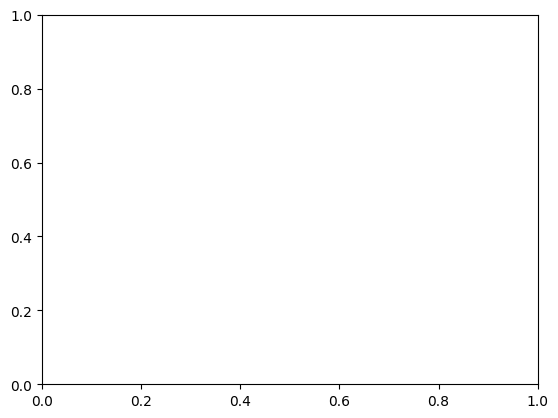

In [17]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SEC 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')